# Задача 1

Ответ на вопрос в задаче:
Данная оценка не будет всегда выполняться из-за того, что мы функцию раскладываем в ряд Тейлора до первого порядка точности. Остальные члены мы не учитываем, хотя они тоже дают вклад.

# Задача 2

3) Учтем, что в схеме 2 слагаемых зануляются и вычтем от производной функции её же вычисленную по схеме
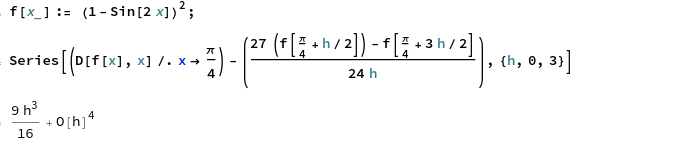

# Задача 3

In [10]:
import numpy as np
from numpy import linalg as LA

3) Нам нужно найти минимум $||S||_F$(это и будет скорость сходимости) и аргумент при котором достигается минимум(это и будет $\tau_{опт}$)

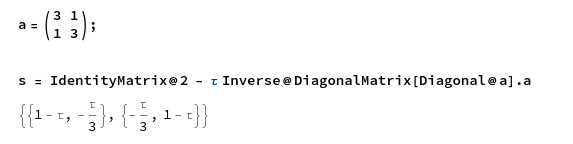

$\tau_{опт} = \dfrac{9}{10}$, т.к. 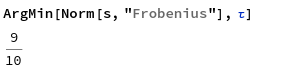

$q_{min} = ||S||_F^{min} = \dfrac{1}{\sqrt{5}}.$

# Задача 4

In [5]:
A = np.diag(np.ones(2))
A[A == 0] = -5*np.ones(2)
A

array([[ 1., -5.],
       [-5.,  1.]])

$||A||_1 = ||A||_2 = ||A||_{\infty} = \frac{3}{2}$

$|A| < 0 $ - метод Ричардсона не сходится. домножим все на $A^{T}: A^{T}Ax =A^{T}f $

In [11]:
A_new = A.T.dot(A)
A_new

array([[ 26., -10.],
       [-10.,  26.]])

In [12]:
f = A.T.dot(np.ones(2))
f

array([-4., -4.])

In [13]:
LA.eig(A_new)[0]

array([36., 16.])

Следовательно,$(0,\frac{2}{36} = \frac{1}{18})$ - область сходимости $\\$
$t_{opt} = \frac{2}{36+16} = \frac{1}{26} $

In [15]:
t_opt = 1/26
R = np.diag(np.ones(2)) - t_opt*A_new 
np.sqrt(LA.eig(R)[0][0])  #норма матрицы

0.6201736729460423

Следовательно, справедлива геометрическая оценка сходимости метода с параметром $q = 0.621$, взьмем формулу из конспекта для оценки количества шагов.

In [16]:
def norm(v):
    return np.sqrt(np.sum(v**2))
eps = 10**(-3)
q = 0.621
N = np.log(eps/norm(f))/np.log(q)
N

18.136407184833885

То есть 18 операций

В данном примере мы имеем самосопряженные и легко обращаемые матрицы, так что для нахождения собственных значений можно воспользоваться степенным методом. 

# Задача 5

1) Ax = p, где 

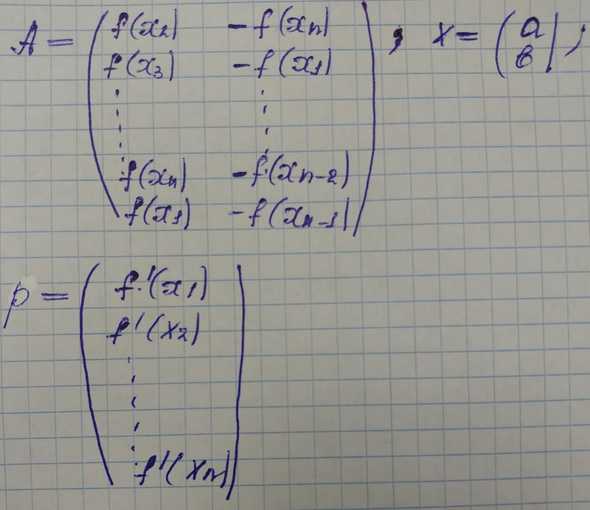
Решение существует, если $rg(A) = rg(A|p) $

2) $f_{arpox}(x_i) = af(x_{i+1}) - bf(x_{i-1})\\
|f_{arpox} - f|^2 = \sum_i (f_{arpox}(x_i) - f(x_i))^2 = \sum_i (af(x_{i+1}) - bf(x_{i-1}) - f(x_i))^2 \rightarrow 
\min$


Градиентный спуск:
$D_L = 0 = (\partial D_a,\partial D_b) \\
\partial D_a = \sum_i 2(af(x_{i+1}) - bf(x_{i-1}) - f(x_i))f(x_{i+1}) = 0 \\
\partial D_b = - \sum_i 2(af(x_{i+1}) - bf(x_{i-1}) - f(x_i))f(x_{i-1}) = 0\\
\sum_i (af(x_{i+1}) - bf(x_{i-1}) - f(x_i))f(x_{i+1}) = 0 \\ 
\sum_i (af(x_{i+1}) - bf(x_{i-1}) - f(x_i))f(x_{i-1}) = 0
$

$a \sum_i f(x_{i+1})^2 - b \sum_i f(x_{i-1}) f(x_{i+1}) - \sum_i f(x_i) f(x_{i+1}) = 0 \\ 
a \sum_i f(x_{i+1})f(x_{i-1})- b \sum_i f(x_{i-1})^2 - \sum_i f(x_i) f(x_{i-1}) = 0$




$$A =
\begin{pmatrix}
  \sum_i f(x_{i+1})^2 & -\sum_i f(x_{i-1}) f(x_{i+1})\\
  \sum_i f(x_{i+1})f(x_{i-1}) &  -\sum_i f(x_{i-1})^2
\end{pmatrix}
\\
f = \begin{pmatrix}
    \sum_i f(x_i) f(x_{i+1})\\
  \sum_i f(x_i) f(x_{i-1})
\end{pmatrix}
$$
- получили СЛАУ, $i \in [2 , N-1]$

   Решение имеется, когда вектора $f(x_{i+1}),f(x_{i-1})$ - лин. не зависимы

Тогда сделаем замену переменной b' = -b
$$A' = \begin{pmatrix}
  \sum_i f(x_{i+1})^2 & \sum_i f(x_{i-1}) f(x_{i+1})\\
  \sum_i f(x_{i+1})f(x_{i-1}) &  \sum_i f(x_{i-1})^2
\end{pmatrix}
\\ $$

$(a,-b) = A'^{-1}f$